# Download Dataset

For this case, we are going to use Fashion MNIST dataset. For getting FMNIST dataset, we could get it easily the data through internet .

Lets download FMNIST dataset like in this following code : 

In [1]:
!mkdir data
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-08-14 06:23:08--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.174
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.174|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  11.9MB/s    in 2.1s    

2019-08-14 06:23:10 (11.9 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-14 06:23:12--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.138
Connecting to fashion-mnist.s3

# Import Data

Then import and make the FMNIST dataset available to use 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
fmnist = input_data.read_data_sets('data/fashion',one_hot=True)

W0814 06:23:58.207479 140309403170688 deprecation.py:323] From <ipython-input-3-9f91165ad083>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0814 06:23:58.210103 140309403170688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0814 06:23:58.213025 140309403170688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting data/fashion/train-images-idx3-ubyte.gz


W0814 06:23:58.593951 140309403170688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0814 06:23:58.598769 140309403170688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0814 06:23:58.675820 140309403170688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


# Preprocessing

In [4]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fmnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fmnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fmnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fmnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


Lets see the example of dataset by visualize it.

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

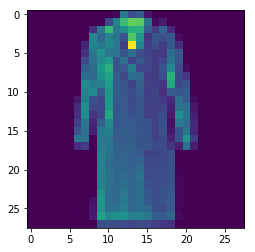

In [5]:
i= 26
data=fmnist.train.images[i,:]
img=np.reshape(data,(28,28))
plt.imshow(img)
fmnist.train.labels[i,:]

as you can see picture above , we had right dataset (Fashion MNIST)

# Autoencoders

Now, lets give the parameter that are going to be used by our NN

In [0]:
# AUTOENCODERS
learning_rate = 0.01
training_epochs = 50
batch_size = 32
display_step = 1
examples_to_show = 20

n_hidden_1 = 64 # 1st layer num features
n_hidden_2 = 32 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28) jumlah pixel dalam 1 image

# tf Graph input 
X = tf.placeholder("float", [None, n_input])
# distribusi normal standart
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
    
}

Now we need to create our encoder. For this, we are going to use sigmoidal functions. Sigmoidal functions continue to deliver great results with this type of networks. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:

In [0]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

And the decoder:

You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [0]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

Let's construct our model. In the variable cost we have the loss function and in the optimizer variable we have our gradient used for backpropagation. In loss function, we use Mean Squared Error (MSE)  and we use RMS as optimizer.

In [0]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Perhitungan loss function dengan mean squared error
loss = tf.losses.mean_squared_error(y_true, y_pred)
# optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Initializing the variables
init = tf.global_variables_initializer()

The training will run for 50 epochs.

In [32]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(fmnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = fmnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, loss], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "loss=", "{:.9f}".format(c))   
print("Optimization Finished!")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 loss= 0.036376860
Epoch: 0002 loss= 0.026529774
Epoch: 0003 loss= 0.031329904
Epoch: 0004 loss= 0.023188654
Epoch: 0005 loss= 0.020168008
Epoch: 0006 loss= 0.019780388
Epoch: 0007 loss= 0.022619564
Epoch: 0008 loss= 0.024474557
Epoch: 0009 loss= 0.018428562
Epoch: 0010 loss= 0.017997138
Epoch: 0011 loss= 0.018547002
Epoch: 0012 loss= 0.017605718
Epoch: 0013 loss= 0.019860806
Epoch: 0014 loss= 0.016265867
Epoch: 0015 loss= 0.019565765
Epoch: 0016 loss= 0.015828412
Epoch: 0017 loss= 0.020186959
Epoch: 0018 loss= 0.016378716
Epoch: 0019 loss= 0.015597955
Epoch: 0020 loss= 0.019860040
Epoch: 0021 loss= 0.019977281
Epoch: 0022 loss= 0.019646524
Epoch: 0023 loss= 0.020106798
Epoch: 0024 loss= 0.018172445
Epoch: 0025 loss= 0.017654754
Epoch: 0026 loss= 0.017730907
Epoch: 0027 loss= 0.020984648
Epoch: 0028 loss= 0.016620204
Epoch: 0029 loss= 0.018097121
Epoch: 0030 loss= 0.018427039
Epoch: 0031 loss= 0.017805655
Epoch: 0032 loss= 0.020307336
Epoch: 0033 loss= 0.014074435
Epoch: 003

Lets count MSE testing dataset

In [33]:
# MSE testing dataset
from sklearn.metrics import r2_score
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(fmnist.train.images)
train_y = np.asanyarray(fmnist.train.labels)
regr.fit (train_x, train_y)
test_x = np.asanyarray(fmnist.test.images)
test_y = np.asanyarray(fmnist.test.labels)
test_y_=regr.predict(test_x)

mse=np.mean((test_y_ - test_y)**2)
mse


0.036690839513887144

Now, let's apply encode and decode for our tests.

In [0]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: fmnist.test.images[:examples_to_show]})

In [25]:
code = sess.run(
    encoder_op, feed_dict={X: fmnist.test.images[:examples_to_show]})

print(code.shape)

(20, 32)


Let's simply visualize our graphs!

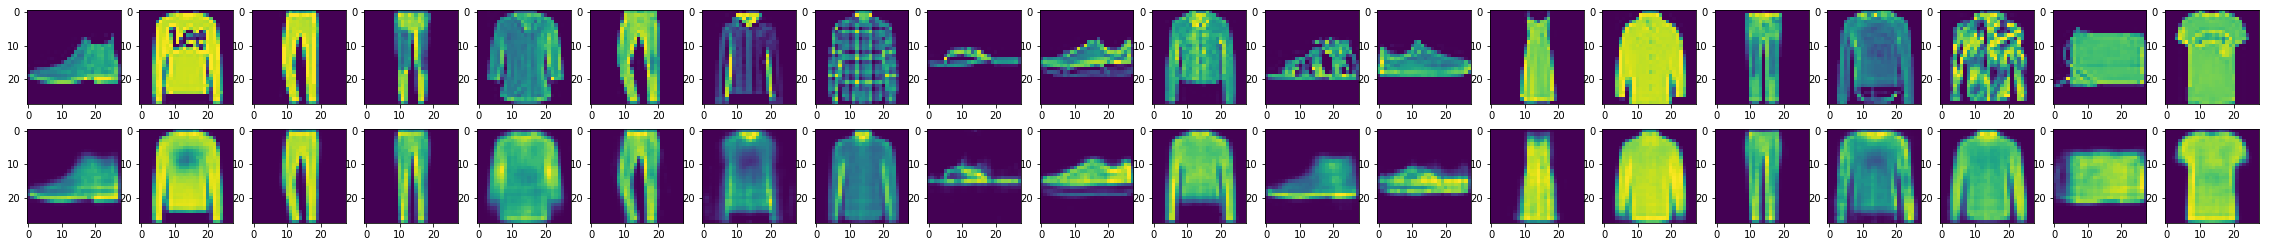

In [36]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 20, figsize=(40, 4))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(fmnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))  

As you can see, the reconstructions were successful. It can be seen that some noise was added to the image. the conclusion from  this experiment, if the loss approaches the value of 0, the autoencoder results will be more perfect

In [0]:
sess.close() #finish the session